In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import math
import os

In [3]:
# Import the listing of block groups
block_groups_path = os.path.join(os.path.dirname(os.path.abspath('..')), 'datasets', 'block_groups_nb.json')
block_groups = gpd.read_file(block_groups_path)
# Import the list of report locations
incident_points_path = os.path.join(os.path.dirname(os.path.abspath('..')), 'datasets', 'incident_points_nb.json')
incident_points = gpd.read_file(incident_points_path)
# Import the full field incident reports dataset
fir_reports_path = os.path.join(os.path.dirname(os.path.abspath('..')), 'datasets', 'field_incident_reports.csv')
fir_reports = pd.read_csv(fir_reports_path)

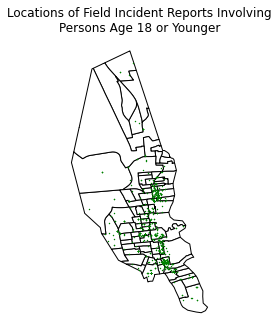

In [4]:
# Start by dropping one record with a missing value for age
fir_reports = fir_reports[fir_reports['AGE']!='    ']
# Add the "Incident Point" column back to the FIR dataset
fir_reports['shapely.geometry.Point'] = incident_points
# Select only those reports where the person stopped was at most 18 years old
fir_reports_18_under = fir_reports[fir_reports.apply(lambda x: int(x.AGE)<=18, axis=1)]
# Set up a series to hold just the points where incidents involving youths occurred
points_18_under = gpd.GeoSeries(fir_reports_18_under['shapely.geometry.Point'])
points_18_under.set_crs(block_groups.crs)

figure_18_under = plt.figure()
axes_18u = figure_18_under.add_axes([0,0,0.5,1])

plot_18u = block_groups.plot(color='white',edgecolor='black',axes=axes_18u)

points_18_under.plot(ax=axes_18u,marker="*",color='green',markersize=0.3)

axes_18u.set_title('Locations of Field Incident Reports Involving\nPersons Age 18 or Younger')
axes_18u.axis('off')
figure_18_under.show()

## Final output for the report: combine the 20-and-under and 18-and-under segments into a single map

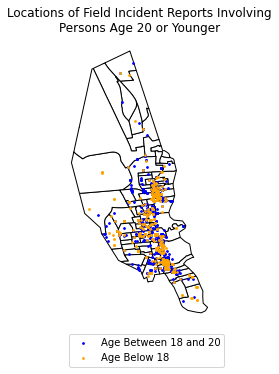

In [27]:
# Select only those reports where the person stopped was between the ages of 18 and 20
fir_reports_18_to_20 = fir_reports[fir_reports.apply(lambda x: (int(x.AGE)<=20 and int(x.AGE)>=18), axis=1)]
# Also select only those reports where the person stopped was age 17 or younger
fir_reports_17_under = fir_reports[fir_reports.apply(lambda x: int(x.AGE)<=17, axis=1)]

# Set up a series to hold just the points where the 18-20 age group incidents occurred
points_18_to_20 = gpd.GeoSeries(fir_reports_20_under['shapely.geometry.Point'])
points_18_to_20.set_crs(block_groups.crs)
# Drop one outlier point from the points_20_under set
points_18_to_20= points_18_to_20[points_18_to_20.apply(lambda x: x.x>-71)]

# Also set up a series for the under-18 incidents
points_17_under = gpd.GeoSeries(fir_reports_17_under['shapely.geometry.Point'])
points_17_under.set_crs(block_groups.crs)

figure_final = plt.figure()
axes_final = figure_final.add_axes([0,0,0.5,1])

plot_final = block_groups.plot(color='white',edgecolor='black',axes=axes_final,legend=True)

points_18_to_20.plot(ax=axes_final,marker="o",color='blue',markersize=3,label='Age Between 18 and 20')
points_17_under.plot(ax=axes_final,marker="o",color='orange',markersize=3,label='Age Below 18')

axes_final.legend(bbox_to_anchor=[1,-0.11,0.1,0.1])

axes_final.set_title('Locations of Field Incident Reports Involving\nPersons Age 20 or Younger')
axes_final.axis('off')
figure_final.show()